In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
import time
from datetime import timedelta
import sklearn.metrics as metrics

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [2]:
df = pd.read_csv('Term_Deposit.csv')
df

Id   age           job   marital  education default  balance  \
0       1001  29.0    management   married   tertiary      no   2143.0   
1       1002  44.0    technician    single  secondary      no     29.0   
2       1003  33.0  entrepreneur   married  secondary      no      2.0   
3       1004  47.0   blue-collar   married    unknown      no   1506.0   
4       1005  33.0       unknown    single    unknown      no      1.0   
...      ...   ...           ...       ...        ...     ...      ...   
45206  46207  51.0    technician   married   tertiary      no    825.0   
45207  46208  71.0       retired  divorced    primary      no   1729.0   
45208  46209  72.0       retired   married  secondary      no   5715.0   
45209  46210  57.0   blue-collar   married  secondary      no    668.0   
45210  46211  37.0  entrepreneur   married  secondary      no   2971.0   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no    unknown    5   may       261         1     -1         0   
1         yes   no    unknown    5   may       151         1     -1         0   
2         yes  yes    unknown    5   may        76         1     -1         0   
3         yes   no    unknown    5   may        92         1     -1         0   
4          no   no    unknown    5   may       198         1     -1         0   
...       ...  ...        ...  ...   ...       ...       ...    ...       ...   
45206      no   no   cellular   17   nov       977         3     -1         0   
45207      no   no   cellular   17   nov       456         2     -1         0   
45208      no   no   cellular   17   nov      1127         5    184         3   
45209      no   no  telephone   17   nov       508         4     -1         0   
45210      no   no   cellular   17   nov       361         2    188        11   

      poutcome    y  
0      unknown   no  
1      unknown   no  
2      unknown   no  
3      unknown   no  
4      unknown   no  
...        ...  ...  
45206  unknown  yes  
45207  unknown  yes  
45208  success  yes  
45209  unknown   no  
45210    other   no  

[45211 rows x 18 columns]

In [3]:
df.dtypes

Id             int64
age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [4]:
df.head()

Id   age           job  marital  education default  balance housing loan  \
0  1001  29.0    management  married   tertiary      no   2143.0     yes   no   
1  1002  44.0    technician   single  secondary      no     29.0     yes   no   
2  1003  33.0  entrepreneur  married  secondary      no      2.0     yes  yes   
3  1004  47.0   blue-collar  married    unknown      no   1506.0     yes   no   
4  1005  33.0       unknown   single    unknown      no      1.0      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [5]:
df.tail()

Id   age           job   marital  education default  balance  \
45206  46207  51.0    technician   married   tertiary      no    825.0   
45207  46208  71.0       retired  divorced    primary      no   1729.0   
45208  46209  72.0       retired   married  secondary      no   5715.0   
45209  46210  57.0   blue-collar   married  secondary      no    668.0   
45210  46211  37.0  entrepreneur   married  secondary      no   2971.0   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
45206      no   no   cellular   17   nov       977         3     -1         0   
45207      no   no   cellular   17   nov       456         2     -1         0   
45208      no   no   cellular   17   nov      1127         5    184         3   
45209      no   no  telephone   17   nov       508         4     -1         0   
45210      no   no   cellular   17   nov       361         2    188        11   

      poutcome    y  
45206  unknown  yes  
45207  unknown  yes  
45208  success  yes  
45209  unknown   no  
45210    other   no

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


In [7]:
df.isnull().sum()

Id           0
age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.describe(include=['O'])

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

In [9]:
df.describe(include=['int64'])

Id           day      duration      campaign         pdays  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean   23606.000000     15.806419    258.163080      2.763841     40.197828   
std    13051.435847      8.322476    257.527812      3.098021    100.128746   
min     1001.000000      1.000000      0.000000      1.000000     -1.000000   
25%    12303.500000      8.000000    103.000000      1.000000     -1.000000   
50%    23606.000000     16.000000    180.000000      2.000000     -1.000000   
75%    34908.500000     21.000000    319.000000      3.000000     -1.000000   
max    46211.000000     31.000000   4918.000000     63.000000    871.000000   

           previous  
count  45211.000000  
mean       0.580323  
std        2.303441  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000

In [10]:
df.describe(include=['float'])

age        balance
count  45202.000000   45208.000000
mean      40.935113    1362.346620
std       10.618151    3044.852387
min       18.000000   -8019.000000
25%       33.000000      72.000000
50%       39.000000     448.000000
75%       48.000000    1428.000000
max       95.000000  102127.000000

In [11]:
df_filtered= df.replace('NaN', np.nan)
df_filtered.dropna(inplace=True)
df_filtered.reset_index(drop=True,inplace=True)
df_filtered.head(18)

Id   age           job   marital  education default  balance housing  \
0   1001  29.0    management   married   tertiary      no   2143.0     yes   
1   1002  44.0    technician    single  secondary      no     29.0     yes   
2   1003  33.0  entrepreneur   married  secondary      no      2.0     yes   
3   1004  47.0   blue-collar   married    unknown      no   1506.0     yes   
4   1005  33.0       unknown    single    unknown      no      1.0      no   
5   1006  35.0    management   married   tertiary      no    231.0     yes   
6   1007  28.0    management    single   tertiary      no    447.0     yes   
7   1011  41.0        admin.  divorced  secondary      no    270.0     yes   
8   1012  29.0        admin.    single  secondary      no    390.0     yes   
9   1013  53.0    technician   married  secondary      no      6.0     yes   
10  1014  58.0    technician   married    unknown      no     71.0     yes   
11  1015  57.0      services   married  secondary      no    162.0     yes   
12  1016  51.0       retired   married    primary      no    229.0     yes   
13  1017  45.0        admin.    single    unknown      no     13.0     yes   
14  1018  57.0   blue-collar   married    primary      no     52.0     yes   
15  1019  60.0       retired   married    primary      no     60.0     yes   
16  1020  33.0      services   married  secondary      no      0.0     yes   
17  1021  28.0   blue-collar   married  secondary      no    723.0     yes   

   loan  contact  day month  duration  campaign  pdays  previous poutcome   y  
0    no  unknown    5   may       261         1     -1         0  unknown  no  
1    no  unknown    5   may       151         1     -1         0  unknown  no  
2   yes  unknown    5   may        76         1     -1         0  unknown  no  
3    no  unknown    5   may        92         1     -1         0  unknown  no  
4    no  unknown    5   may       198         1     -1         0  unknown  no  
5    no  unknown    5   may       139         1     -1         0  unknown  no  
6   yes  unknown    5   may       217         1     -1         0  unknown  no  
7    no  unknown    5   may       222         1     -1         0  unknown  no  
8    no  unknown    5   may       137         1     -1         0  unknown  no  
9    no  unknown    5   may       517         1     -1         0  unknown  no  
10   no  unknown    5   may        71         1     -1         0  unknown  no  
11   no  unknown    5   may       174         1     -1         0  unknown  no  
12   no  unknown    5   may       353         1     -1         0  unknown  no  
13   no  unknown    5   may        98         1     -1         0  unknown  no  
14   no  unknown    5   may        38         1     -1         0  unknown  no  
15   no  unknown    5   may       219         1     -1         0  unknown  no  
16   no  unknown    5   may        54         1     -1         0  unknown  no  
17  yes  unknown    5   may       262         1     -1         0  unknown  no

In [12]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45200 entries, 0 to 45199
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45200 non-null  int64  
 1   age        45200 non-null  float64
 2   job        45200 non-null  object 
 3   marital    45200 non-null  object 
 4   education  45200 non-null  object 
 5   default    45200 non-null  object 
 6   balance    45200 non-null  float64
 7   housing    45200 non-null  object 
 8   loan       45200 non-null  object 
 9   contact    45200 non-null  object 
 10  day        45200 non-null  int64  
 11  month      45200 non-null  object 
 12  duration   45200 non-null  int64  
 13  campaign   45200 non-null  int64  
 14  pdays      45200 non-null  int64  
 15  previous   45200 non-null  int64  
 16  poutcome   45200 non-null  object 
 17  y          45200 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


In [13]:
df_filtered.isnull().sum()

Id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

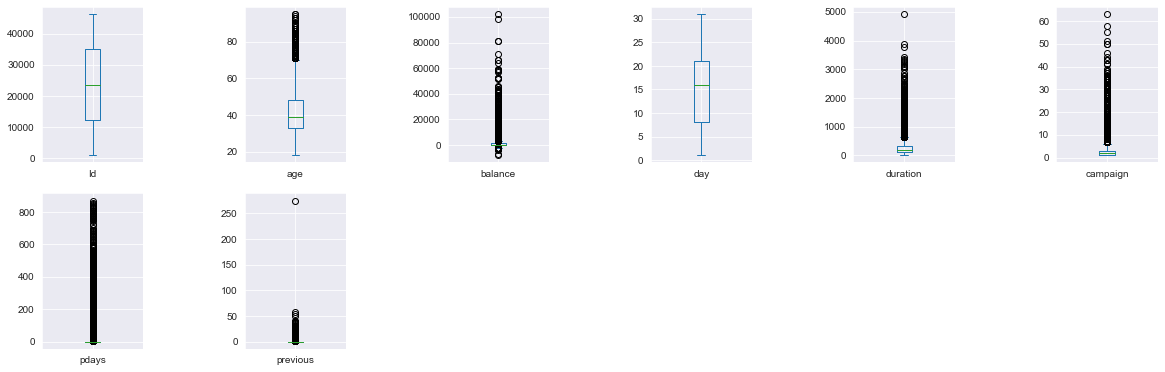

In [14]:
#subplots
df_filtered.plot(kind="box", subplots=True, layout=(6,6), figsize=(20,20))
plt.subplots_adjust(wspace=1);

In [15]:
#Xóa cột không cần thiết: ID
del df_filtered['Id']

In [16]:
##Tiến hành đổi dữ liệu chữ thành số

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder = LabelEncoder()
df_filtered['job'] = encoder.fit_transform(df_filtered['job'])
job = {index : label for index, label in enumerate(encoder.classes_)}
job

{0: 'admin.',
 1: 'blue-collar',
 2: 'entrepreneur',
 3: 'housemaid',
 4: 'management',
 5: 'retired',
 6: 'self-employed',
 7: 'services',
 8: 'student',
 9: 'technician',
 10: 'unemployed',
 11: 'unknown'}

In [19]:
df_filtered['marital'] = encoder.fit_transform(df_filtered['marital'])
marital = {index : label for index, label in enumerate(encoder.classes_)}
marital

{0: 'divorced', 1: 'married', 2: 'single'}

In [20]:
df_filtered['education'] = encoder.fit_transform(df_filtered['education'])
education = {index : label for index, label in enumerate(encoder.classes_)}
education

{0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'}

In [21]:
df_filtered['default'] = encoder.fit_transform(df_filtered['default'])
default = {index : label for index, label in enumerate(encoder.classes_)}
default

{0: 'no', 1: 'yes'}

In [22]:
df_filtered['loan'] = encoder.fit_transform(df_filtered['loan'])
loan = {index : label for index, label in enumerate(encoder.classes_)}
loan

{0: 'no', 1: 'yes'}

In [23]:
df_filtered['contact'] = encoder.fit_transform(df_filtered['contact'])
contact = {index : label for index, label in enumerate(encoder.classes_)}
contact

{0: 'cellular', 1: 'telephone', 2: 'unknown'}

In [24]:
df_filtered['month'] = encoder.fit_transform(df_filtered['month'])
month = {index : label for index, label in enumerate(encoder.classes_)}
month

{0: 'apr',
 1: 'aug',
 2: 'dec',
 3: 'feb',
 4: 'jan',
 5: 'jul',
 6: 'jun',
 7: 'mar',
 8: 'may',
 9: 'nov',
 10: 'oct',
 11: 'sep'}

In [25]:
df_filtered['poutcome'] = encoder.fit_transform(df_filtered['poutcome'])
poutcome = {index : label for index, label in enumerate(encoder.classes_)}
poutcome

{0: 'failure', 1: 'other', 2: 'success', 3: 'unknown'}

In [26]:
df_filtered['housing'] = encoder.fit_transform(df_filtered['housing'])
housing = {index : label for index, label in enumerate(encoder.classes_)}
housing

{0: 'no', 1: 'yes'}

In [27]:
#đổi số âm trong cột pdays
df_filtered['pdays']= df_filtered['pdays'].replace([-1], 0)
print(df_filtered['pdays'])

0          0
1          0
2          0
3          0
4          0
        ... 
45195      0
45196      0
45197    184
45198      0
45199    188
Name: pdays, Length: 45200, dtype: int64


In [28]:
df_filtered['y'] = encoder.fit_transform(df_filtered['y'])
y = {index : label for index, label in enumerate(encoder.classes_)}
y

{0: 'no', 1: 'yes'}

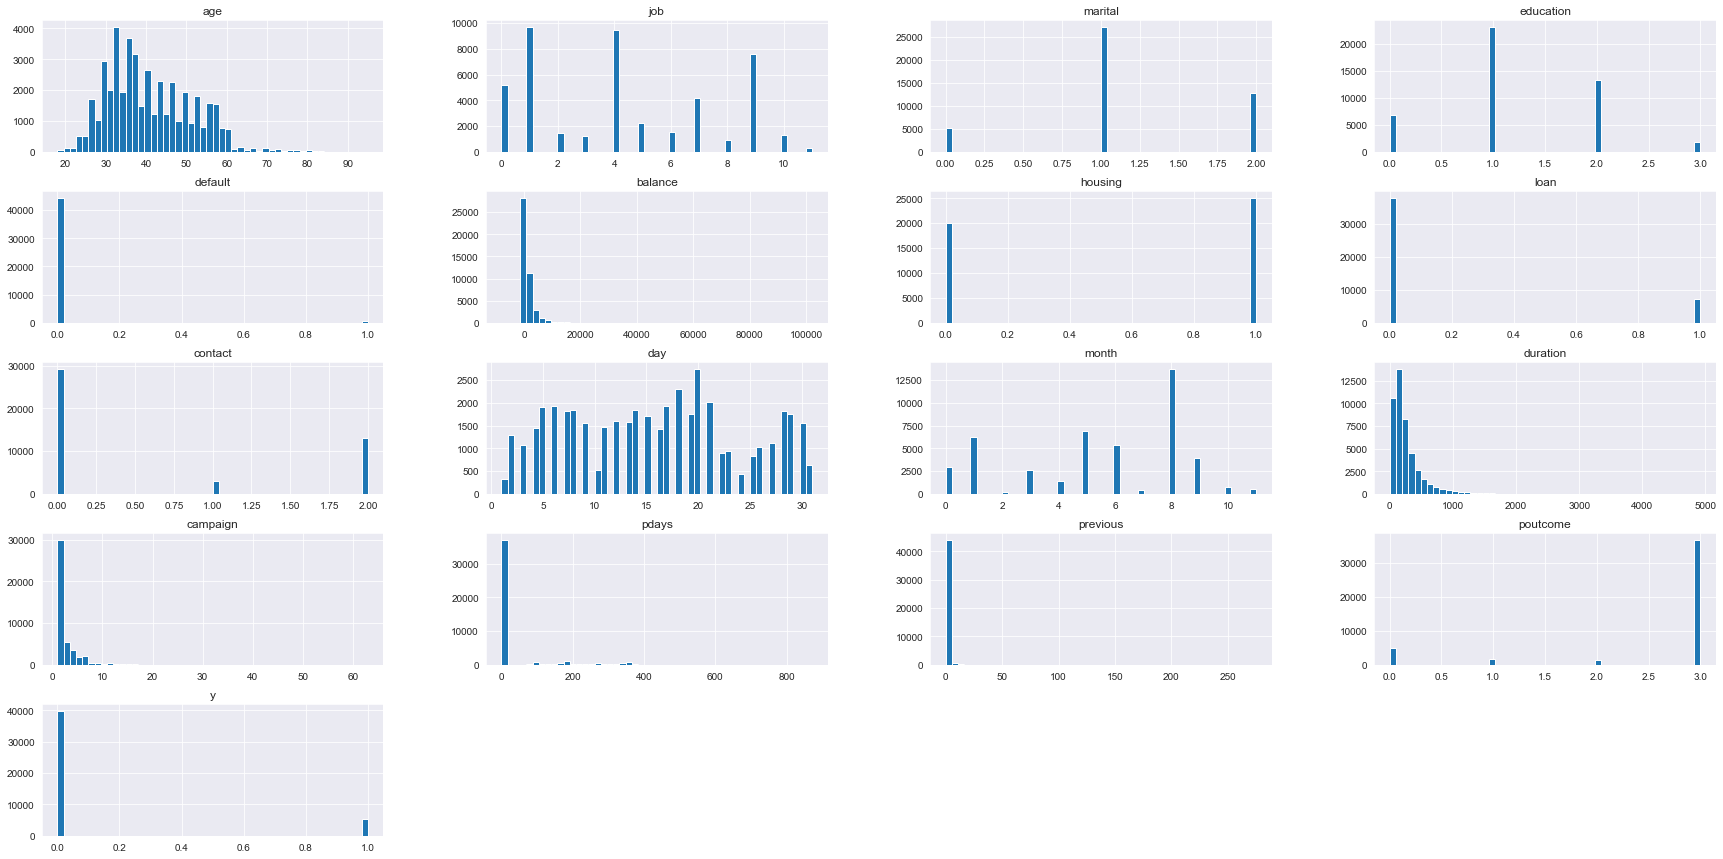

In [29]:
df_filtered.hist(bins=50,figsize=(30, 15))
plt.show()


In [30]:
df_filtered.head(18)

age  job  marital  education  default  balance  housing  loan  contact  \
0   29.0    4        1          2        0   2143.0        1     0        2   
1   44.0    9        2          1        0     29.0        1     0        2   
2   33.0    2        1          1        0      2.0        1     1        2   
3   47.0    1        1          3        0   1506.0        1     0        2   
4   33.0   11        2          3        0      1.0        0     0        2   
5   35.0    4        1          2        0    231.0        1     0        2   
6   28.0    4        2          2        0    447.0        1     1        2   
7   41.0    0        0          1        0    270.0        1     0        2   
8   29.0    0        2          1        0    390.0        1     0        2   
9   53.0    9        1          1        0      6.0        1     0        2   
10  58.0    9        1          3        0     71.0        1     0        2   
11  57.0    7        1          1        0    162.0        1     0        2   
12  51.0    5        1          0        0    229.0        1     0        2   
13  45.0    0        2          3        0     13.0        1     0        2   
14  57.0    1        1          0        0     52.0        1     0        2   
15  60.0    5        1          0        0     60.0        1     0        2   
16  33.0    7        1          1        0      0.0        1     0        2   
17  28.0    1        1          1        0    723.0        1     1        2   

    day  month  duration  campaign  pdays  previous  poutcome  y  
0     5      8       261         1      0         0         3  0  
1     5      8       151         1      0         0         3  0  
2     5      8        76         1      0         0         3  0  
3     5      8        92         1      0         0         3  0  
4     5      8       198         1      0         0         3  0  
5     5      8       139         1      0         0         3  0  
6     5      8       217         1      0         0         3  0  
7     5      8       222         1      0         0         3  0  
8     5      8       137         1      0         0         3  0  
9     5      8       517         1      0         0         3  0  
10    5      8        71         1      0         0         3  0  
11    5      8       174         1      0         0         3  0  
12    5      8       353         1      0         0         3  0  
13    5      8        98         1      0         0         3  0  
14    5      8        38         1      0         0         3  0  
15    5      8       219         1      0         0         3  0  
16    5      8        54         1      0         0         3  0  
17    5      8       262         1      0         0         3  0

In [31]:
numeric = df_filtered.select_dtypes(exclude='object')

In [32]:
cols_to_check = [col for col in numeric.columns if col not in ['y']]
cols_to_check

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [33]:
numerical_data = df_filtered.select_dtypes(include="number")
numerical_data

age  job  marital  education  default  balance  housing  loan  \
0      29.0    4        1          2        0   2143.0        1     0   
1      44.0    9        2          1        0     29.0        1     0   
2      33.0    2        1          1        0      2.0        1     1   
3      47.0    1        1          3        0   1506.0        1     0   
4      33.0   11        2          3        0      1.0        0     0   
...     ...  ...      ...        ...      ...      ...      ...   ...   
45195  51.0    9        1          2        0    825.0        0     0   
45196  71.0    5        0          0        0   1729.0        0     0   
45197  72.0    5        1          1        0   5715.0        0     0   
45198  57.0    1        1          1        0    668.0        0     0   
45199  37.0    2        1          1        0   2971.0        0     0   

       contact  day  month  duration  campaign  pdays  previous  poutcome  y  
0            2    5      8       261         1      0         0         3  0  
1            2    5      8       151         1      0         0         3  0  
2            2    5      8        76         1      0         0         3  0  
3            2    5      8        92         1      0         0         3  0  
4            2    5      8       198         1      0         0         3  0  
...        ...  ...    ...       ...       ...    ...       ...       ... ..  
45195        0   17      9       977         3      0         0         3  1  
45196        0   17      9       456         2      0         0         3  1  
45197        0   17      9      1127         5    184         3         2  1  
45198        1   17      9       508         4      0         0         3  0  
45199        0   17      9       361         2    188        11         1  0  

[45200 rows x 17 columns]

# Phân loại data
1. Category features: "age","job", "marital", "education", "default","housing","loan","contact","day","month","campaign","previous","poutcome".
2. Discrete and Continous features: "balance", "duration","pdays"
3. Label: "y"
4. Unnecessary features: "id"

# Chi-square test
Đặt giả thuyết:

Null hypothesis (H0) : output feature không phụ thuộc input feature
Alternate hypothesis (H1): output feature có phụ thuộc input feature
Nếu ta chấp nhận giả thuyết H0, tức label không phụ thuộc vào input feature đang xét và ngược lại

Mức alpha xét = 0.05

Mục tiêu: lấy ra được những feature có tác động tới output

In [34]:
from sklearn.feature_selection import SelectKBest, chi2

In [35]:
#chi square test
categorical_features = df_filtered[[ "age","job", "marital", "education", "default","housing","loan","contact","day","month","campaign","previous","poutcome"]]

In [36]:
best_features = SelectKBest(chi2, k=13)
best_features.fit(categorical_features, df_filtered["y"])

SelectKBest(k=13, score_func=<function chi2 at 0x000001903B0D7490>)

In [37]:
from sklearn.feature_selection import SelectKBest, chi2
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['chi2_values'] = best_features.scores_
df_score['columns'] = [ "age","job", "marital", "education", "default","housing","loan","contact","day","month","campaign","previous","poutcome"]
df_score.sort_values(by='p_values')

p_values  chi2_values    columns
11   0.000000e+00  3590.741918   previous
7   2.711151e-274  1252.236022    contact
10  4.781671e-185   841.637603   campaign
5    1.611856e-86   388.670435    housing
1    1.540986e-41   182.279185        job
6    2.815253e-40   176.500621       loan
8    8.917058e-37   160.473379        day
12   1.510294e-24   104.579260   poutcome
3    1.646483e-21    90.730349  education
0    1.318813e-18    77.512557        age
9    3.177788e-11    44.064208      month
2    4.732491e-08    29.823385    marital
4    2.406103e-06    22.239986    default

In [38]:
#chọn ra những giá trị < 0.05, < alpha
df_score[df_score['p_values'] <= 0.05]['columns']

0           age
1           job
2       marital
3     education
4       default
5       housing
6          loan
7       contact
8           day
9         month
10     campaign
11     previous
12     poutcome
Name: columns, dtype: object

# Anova F-test
Đặt giả thuyết:

Null hypothesis (H0) : 2 groups có cùng phương sai
Alternate hypothesis (H1): 2 groups có phương sai khác nhau
Nếu ta chấp nhận giả thuyết H0, tức input feature hiện tại không ảnh hưởng tới label và ngược lại

Mức alpha xét = 0.05

Mục tiêu: lấy ra được những feature có tác động tới output

In [39]:
#anova
from sklearn.feature_selection import SelectKBest, f_classif

In [40]:
continous_features = df_filtered[["balance", "duration","pdays"]]

In [41]:
best_features = SelectKBest(f_classif, k=3)
best_features.fit(continous_features , df_filtered["y"])

SelectKBest(k=3)

In [42]:
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['anova_values'] = best_features.scores_
df_score['columns'] = ["balance", "duration","pdays"]
df_score.sort_values(by='p_values')

p_values  anova_values   columns
1   0.000000e+00   8342.836712  duration
2  1.930935e-107    487.412512     pdays
0   2.774105e-29    126.382010   balance

In [43]:
# chọn ra những features <= alpha
df_score[df_score['p_values'] <= 0.05]['columns']

0     balance
1    duration
2       pdays
Name: columns, dtype: object

# chọn balance, duration,pdays,age,job, marital, education, default, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome làm input
# y làm output

In [44]:
input = df_filtered[[ "age","job", "marital", "education", "default","housing","loan","contact","day","month","campaign","previous","poutcome","balance", "duration","pdays"]].to_numpy()

In [45]:
input.shape

(45200, 16)

In [46]:
label = df_filtered["y"].to_numpy()

In [47]:
df_filtered.drop(columns=["y"], inplace=True)

In [48]:
label.shape

(45200,)

In [49]:
df_filtered.head(18)

age  job  marital  education  default  balance  housing  loan  contact  \
0   29.0    4        1          2        0   2143.0        1     0        2   
1   44.0    9        2          1        0     29.0        1     0        2   
2   33.0    2        1          1        0      2.0        1     1        2   
3   47.0    1        1          3        0   1506.0        1     0        2   
4   33.0   11        2          3        0      1.0        0     0        2   
5   35.0    4        1          2        0    231.0        1     0        2   
6   28.0    4        2          2        0    447.0        1     1        2   
7   41.0    0        0          1        0    270.0        1     0        2   
8   29.0    0        2          1        0    390.0        1     0        2   
9   53.0    9        1          1        0      6.0        1     0        2   
10  58.0    9        1          3        0     71.0        1     0        2   
11  57.0    7        1          1        0    162.0        1     0        2   
12  51.0    5        1          0        0    229.0        1     0        2   
13  45.0    0        2          3        0     13.0        1     0        2   
14  57.0    1        1          0        0     52.0        1     0        2   
15  60.0    5        1          0        0     60.0        1     0        2   
16  33.0    7        1          1        0      0.0        1     0        2   
17  28.0    1        1          1        0    723.0        1     1        2   

    day  month  duration  campaign  pdays  previous  poutcome  
0     5      8       261         1      0         0         3  
1     5      8       151         1      0         0         3  
2     5      8        76         1      0         0         3  
3     5      8        92         1      0         0         3  
4     5      8       198         1      0         0         3  
5     5      8       139         1      0         0         3  
6     5      8       217         1      0         0         3  
7     5      8       222         1      0         0         3  
8     5      8       137         1      0         0         3  
9     5      8       517         1      0         0         3  
10    5      8        71         1      0         0         3  
11    5      8       174         1      0         0         3  
12    5      8       353         1      0         0         3  
13    5      8        98         1      0         0         3  
14    5      8        38         1      0         0         3  
15    5      8       219         1      0         0         3  
16    5      8        54         1      0         0         3  
17    5      8       262         1      0         0         3

In [50]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45200 entries, 0 to 45199
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45200 non-null  float64
 1   job        45200 non-null  int32  
 2   marital    45200 non-null  int32  
 3   education  45200 non-null  int32  
 4   default    45200 non-null  int32  
 5   balance    45200 non-null  float64
 6   housing    45200 non-null  int32  
 7   loan       45200 non-null  int32  
 8   contact    45200 non-null  int32  
 9   day        45200 non-null  int64  
 10  month      45200 non-null  int32  
 11  duration   45200 non-null  int64  
 12  campaign   45200 non-null  int64  
 13  pdays      45200 non-null  int64  
 14  previous   45200 non-null  int64  
 15  poutcome   45200 non-null  int32  
dtypes: float64(2), int32(9), int64(5)
memory usage: 4.0 MB


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(df_filtered,label,test_size=0.3,random_state=42)

In [53]:
x_train.shape


(31640, 16)

In [54]:
y_train.shape


(31640,)

In [55]:
x_test.shape


(13560, 16)

In [56]:
y_test.shape

(13560,)

In [57]:
#Decision Tree (CART)
from sklearn import tree
import time
from datetime import timedelta
clf1 = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
start_cart = time.time()
cart_pred = clf1.fit(x_train, y_train).predict(x_test)
end_cart = time.time()
times_cart = timedelta(seconds=round(end_cart - start_cart,4)).total_seconds()
print("Time decision tree (CART)",times_cart)

Time decision tree (CART) 0.2142


In [58]:
import sklearn.metrics as metrics
cart_score = metrics.accuracy_score(y_test, cart_pred)
accuracies_cart= cart_score
print("Accuracy",cart_score)
print("Report",metrics.classification_report(y_test,cart_pred))

Accuracy 0.8744100294985251
Report               precision    recall  f1-score   support

           0       0.93      0.93      0.93     11939
           1       0.47      0.48      0.48      1621

    accuracy                           0.87     13560
   macro avg       0.70      0.70      0.70     13560
weighted avg       0.87      0.87      0.87     13560



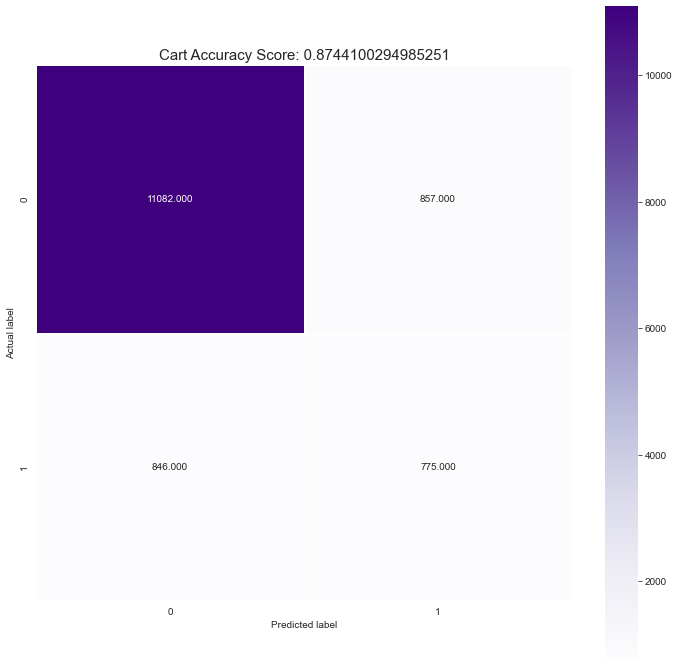

In [59]:
cart_cm = metrics.confusion_matrix(y_test, cart_pred)
plt.figure(figsize=(12,12))
ax= sns.heatmap(cart_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Purples')
ax.set_ylabel ('Actual label')
ax.set_xlabel('Predicted label')
title = 'Cart Accuracy Score: {0}'.format(cart_score)
plt.title(title,size=15)
plt.show()

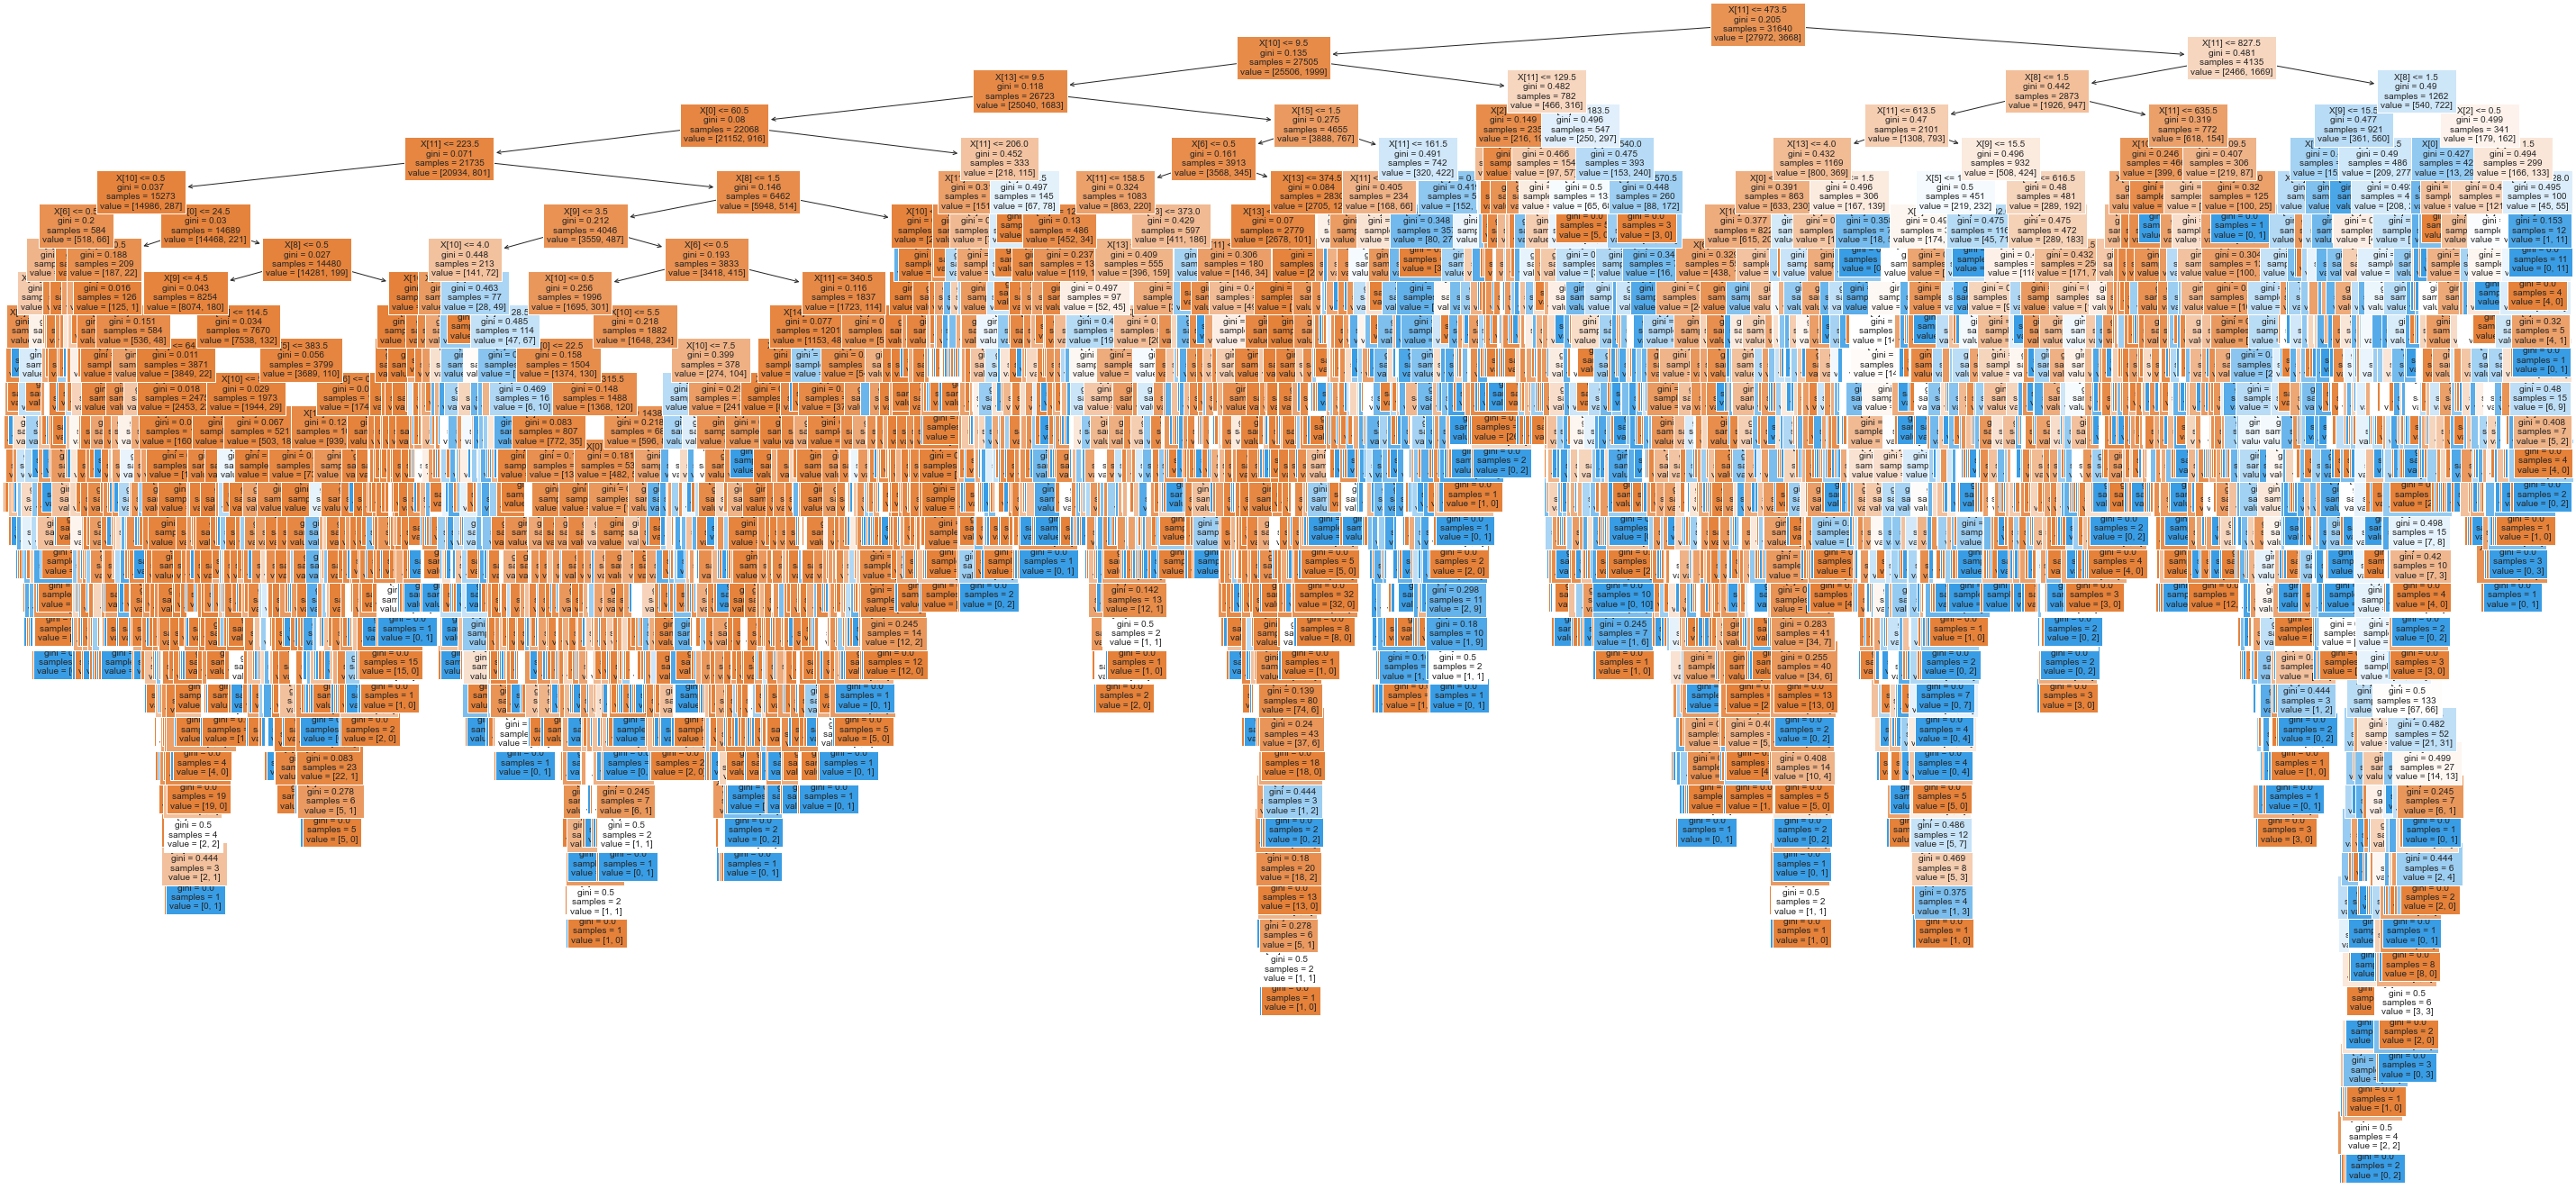

In [60]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf1,filled=True,fontsize=10)
plt.savefig('decision_tree_cart',dpi=100)
plt.show()

In [61]:
#Tan, Decision Tree (ID3)
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
start_tree = time.time()
id3_pred = clf.fit(x_train, y_train).predict(x_test)
end_tree = time.time()
times_id3 = timedelta(seconds=round(end_tree - start_tree,4)).total_seconds()
print("Time decision tree (ID3)",times_id3)

Time decision tree (ID3) 0.2161


In [62]:
#Tan, Decision Tree (ID3)
id3_score = metrics.accuracy_score(y_test, id3_pred)
accuracies_id3=id3_score
print("Accuracy",accuracies_id3)
print("Report",metrics.classification_report(y_test,id3_pred))

Accuracy 0.8750737463126844
Report               precision    recall  f1-score   support

           0       0.93      0.93      0.93     11939
           1       0.48      0.46      0.47      1621

    accuracy                           0.88     13560
   macro avg       0.70      0.69      0.70     13560
weighted avg       0.87      0.88      0.87     13560



Text(0.5, 1.0, 'ID3 Accuracy Score: 0.8750737463126844')

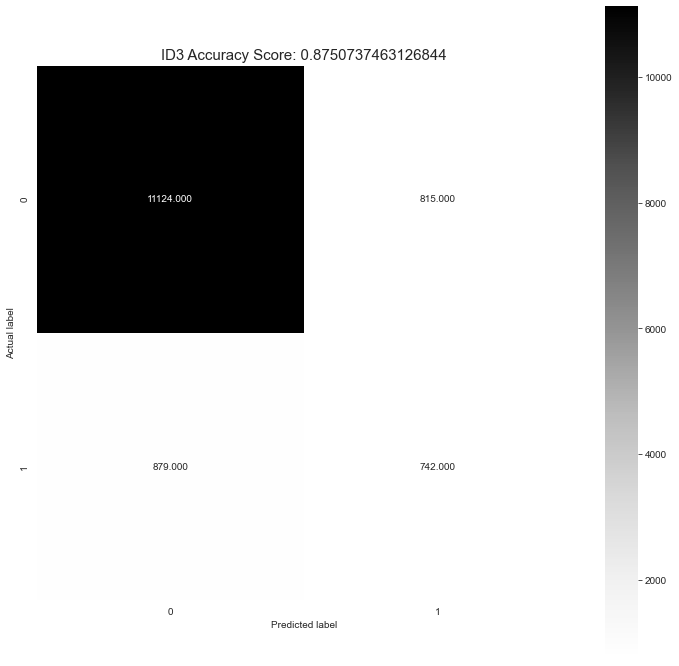

In [63]:
id3_cm = metrics.confusion_matrix(y_test, id3_pred)
plt.figure(figsize=(12,12))
ax =sns.heatmap(id3_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Greys')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
title = 'ID3 Accuracy Score: {0}'.format(id3_score)
plt.title(title,size=15)

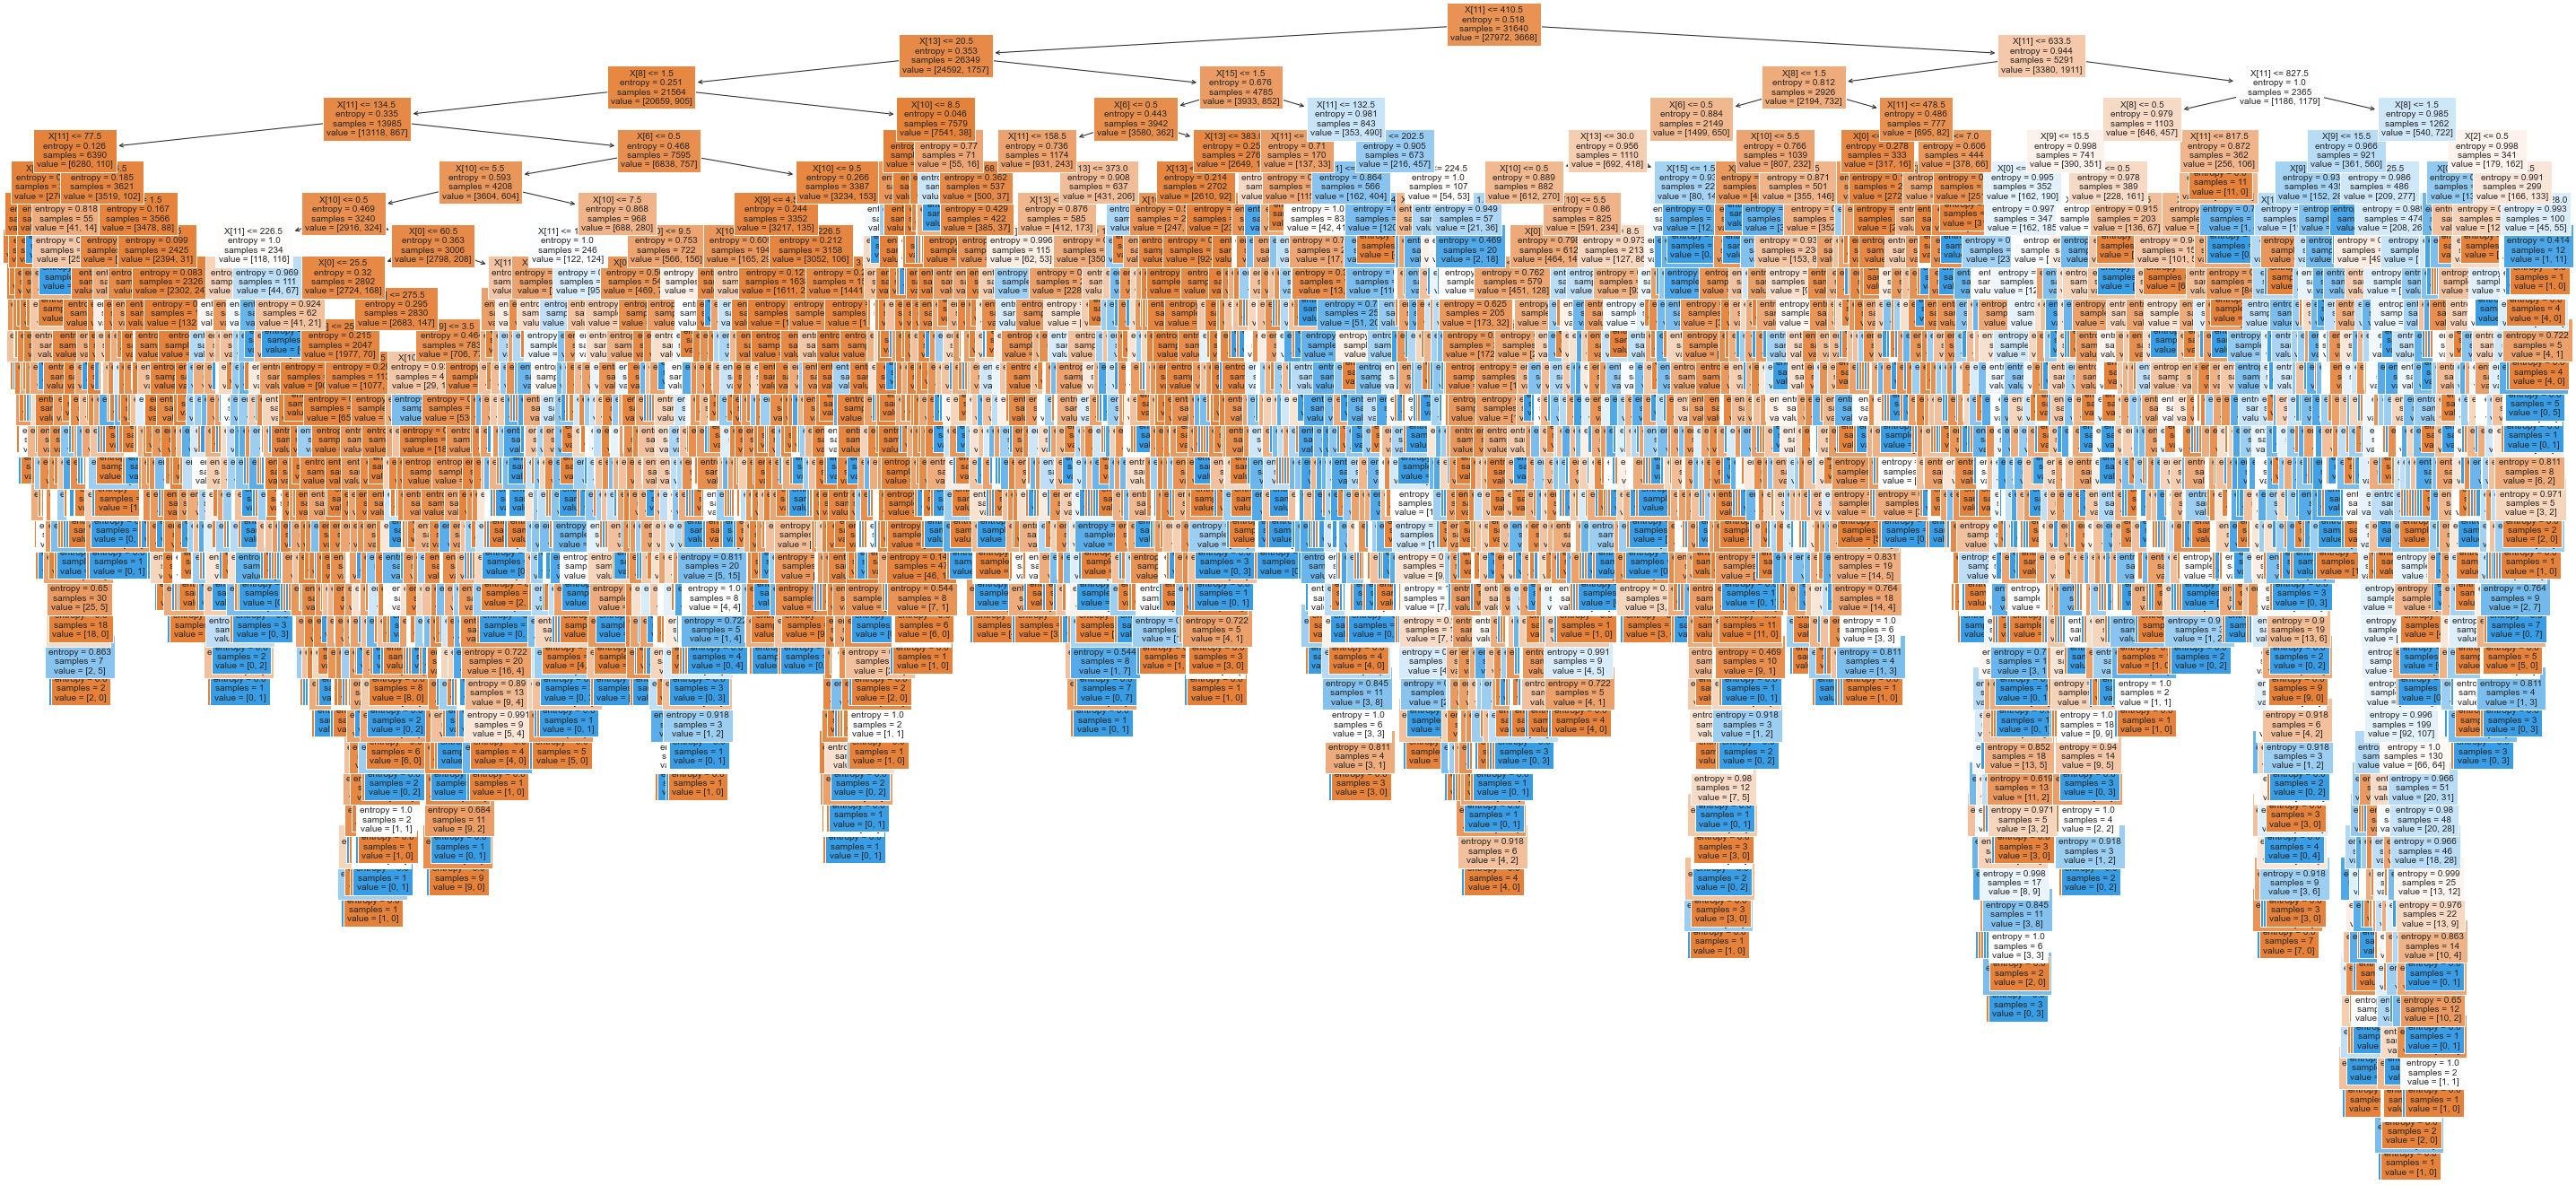

In [64]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

In [65]:
#KNearest
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import classification_report
from datetime import timedelta
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
start_knn = time.time()
knn_scores =  []

for i in range (1,12):
    knc = KNeighborsClassifier(i)
    knn_pred = knc.fit(x_train, y_train).predict(x_test)
    knn_scores.append(metrics.accuracy_score(y_test, knn_pred))
    max_knn_score = max (knn_scores)
knn_score_ind = [i for i, v in enumerate(knn_scores) if v == max_knn_score]
end_knn =time.time()
times_knn = timedelta(seconds=round(end_knn - start_knn,4)).total_seconds()
print('Highest Accuracy Score : {}% with k = {}'.format(max_knn_score*100, list(map(lambda x: x + 1, knn_score_ind))))
print ('Time', times_knn)
knn_score = max_knn_score
accuracies_max_knn = knn_score
print("Accuracy", accuracies_max_knn)
print("Report", metrics.classification_report(y_test, knn_pred))

Highest Accuracy Score : 88.59144542772862% with k = [9]
Time 11.2676
Accuracy 0.8859144542772861
Report               precision    recall  f1-score   support

           0       0.90      0.97      0.94     11939
           1       0.54      0.23      0.32      1621

    accuracy                           0.88     13560
   macro avg       0.72      0.60      0.63     13560
weighted avg       0.86      0.88      0.86     13560



Text(0.5, 1.0, 'K-Nearest Neighbors Accuracy Score : 0.8859144542772861')

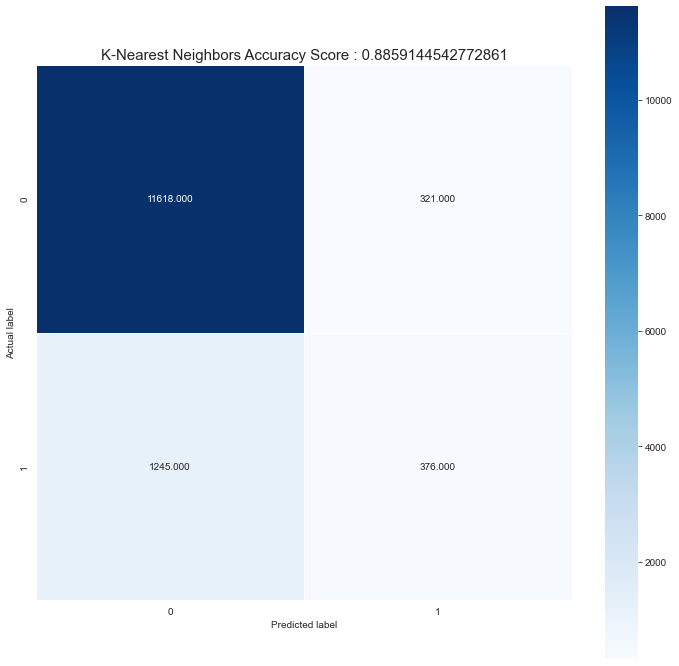

In [66]:
knn_cm = metrics.confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(12,12))
ax =sns.heatmap(knn_cm, annot =True, fmt =".3f",linewidths = .5, square =True, cmap= 'Blues')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
title = 'K-Nearest Neighbors Accuracy Score : {0}'.format(knn_score)
plt.title(title, size =15)

In [67]:
#RandomForest
#accuracy cao nhất => chọn random forest
from sklearn.ensemble import RandomForestClassifier
import time
rf_scores =  []
rfc = RandomForestClassifier()
start_rf =time.time()
rf_pred = rfc.fit(x_train, y_train).predict(x_test)
end_rf= time.time()
times_rf = timedelta(seconds=round(end_rf - start_rf,4)).total_seconds()
print ("time", times_rf)
rf_score = metrics.accuracy_score(y_test, rf_pred)
accuracies_rf_score = rf_score
print("Accuracy", rf_score)
print("Report", metrics.classification_report(y_test, rf_pred))

time 3.7067
Accuracy 0.9073008849557522
Report               precision    recall  f1-score   support

           0       0.92      0.98      0.95     11939
           1       0.69      0.41      0.51      1621

    accuracy                           0.91     13560
   macro avg       0.81      0.69      0.73     13560
weighted avg       0.90      0.91      0.90     13560



Text(0.5, 1.0, 'Random Forest Accuracy Score : 0.9073008849557522')

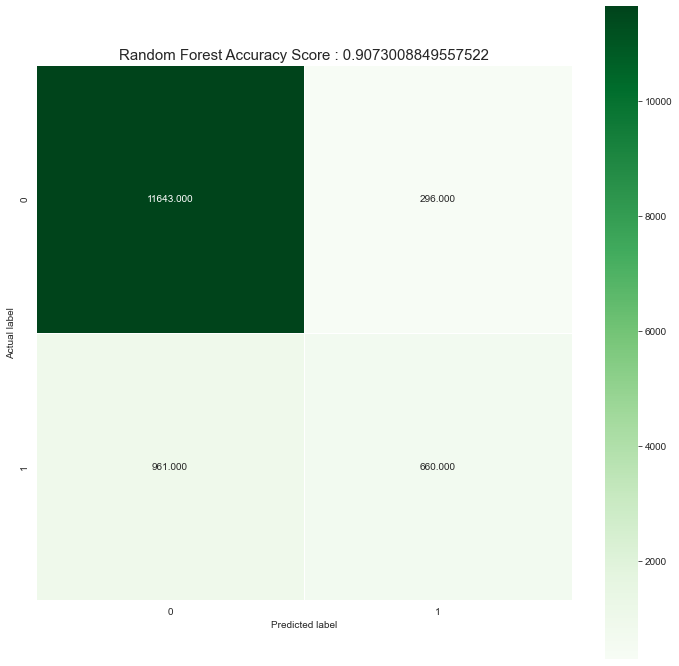

In [68]:
rf_cm = metrics.confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(12,12))
ax= sns.heatmap(rf_cm,annot =True, fmt =".3f",linewidths = .5, square =True, cmap= 'Greens')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
title ='Random Forest Accuracy Score : {0}'.format(rf_score)
plt.title(title, size =15)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

NameError: name 'x' is not defined

In [74]:
#Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
import time
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
start_lr = time.time()
lr_scores =  []

In [93]:
lr = LogisticRegression(max_iter=50000)
start_lr = time.time()
lr_pred = lr.fit(x_train, y_train).predict(x_test)
end_lr = time.time()
times_lr = timedelta(seconds=round(end_lr - start_lr,4)).total_seconds()
print("Time Logistic Regression (lr)",times_lr)

Time Logistic Regression (lr) 8.6268


In [78]:
lr_score = metrics.accuracy_score(y_test, lr_pred)
accuracies_logistic_regression=lr_score
print("Accuracy", lr_score)
print("Report", metrics.classification_report(y_test, lr_pred,labels=np.unique(lr_pred)))


Accuracy 0.8889380530973451
Report               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11939
           1       0.60      0.21      0.31      1621

    accuracy                           0.89     13560
   macro avg       0.75      0.59      0.62     13560
weighted avg       0.87      0.89      0.86     13560



Text(0.5, 1.0, 'Logistic Regression Accuracy Score: 0.8889380530973451')

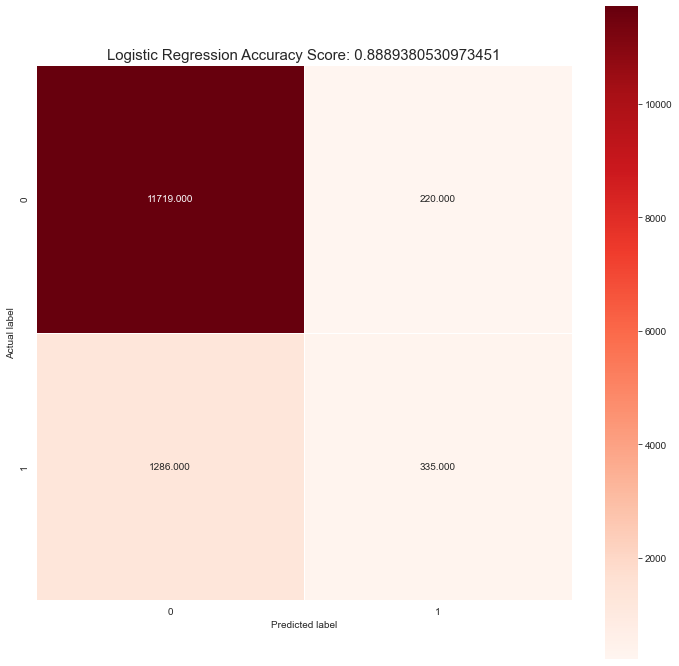

In [79]:
lr_cm = metrics.confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(12,12))
sns.heatmap(lr_cm,annot=True, fmt=".3f", linewidths=.5, square =True, cmap='Reds')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Logistic Regression Accuracy Score: {0}'. format(lr_score)
plt.title(title, size =15)

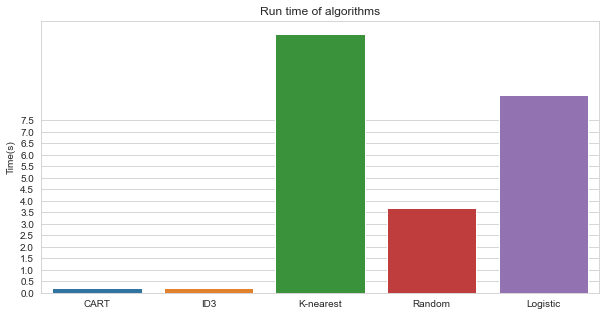

In [94]:
colors = ['purple', 'grey', 'blue', 'green', 'red']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,8,0.5))
plt.ylabel('Time(s)')
plt.title('Run time of algorithms')
sns.barplot(x=list(['CART','ID3','K-nearest','Random','Logistic']), y= list([times_cart, times_id3, times_knn, times_rf, times_lr]))
plt.show()

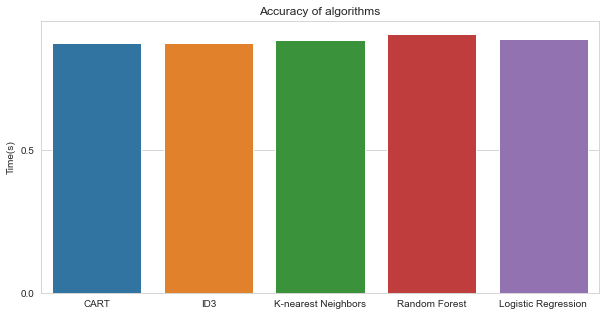

In [95]:
colors = ['purple', 'grey', 'blue', 'green', 'red']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,1,0.5))
plt.ylabel('Time(s)')
plt.title('Accuracy of algorithms')
sns.barplot(x=list(['CART','ID3','K-nearest Neighbors','Random Forest','Logistic Regression']), y=list([accuracies_cart, accuracies_id3, accuracies_max_knn, accuracies_rf_score, accuracies_logistic_regression]))
plt.show()

# => thuật toán được lựa chọn là random forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
#tim thuoc tinh co do tin cay cao
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

feature_imp = pd.Series(clf.feature_importances_, index =df_filtered.columns).sort_values(ascending =False)
feature_imp

duration     0.287328
balance      0.110682
age          0.105740
day          0.091525
month        0.085677
pdays        0.051140
poutcome     0.050666
job          0.049452
campaign     0.037528
education    0.028432
housing      0.027244
marital      0.023133
previous     0.019977
contact      0.019422
loan         0.010217
default      0.001837
dtype: float64

In [89]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel (RandomForestClassifier(n_estimators = 100))
sel.fit (x_train, y_train)


SelectFromModel(estimator=RandomForestClassifier())

In [91]:
selected_feat = x_train.columns[(sel.get_support())]
len(selected_feat)

5

In [92]:
print(selected_feat)

Index(['age', 'balance', 'day', 'month', 'duration'], dtype='object')
